# Bernstein-Vazirani

## The oracle

In [13]:
from qat.lang.AQASM import *

In this oracle implementation, we will provide a random bitstring. Remember that, given bitstring $a = [a_0, a_1, \ldots, a_{n-1}$, the function implemented by the oracle is $\bigotimes_{i=0}^{n-1}a_i$ 

In [23]:
import random
@build_gate("MyOracle", [int])
def bitwise_product(nqubits,):
    qrout = QRoutine()
    qreg = qrout.new_wires(nqubits)
    qout = qrout.new_wires(1)
    bitstring = bin(random.getrandbits(nqubits))[2:].zfill(nqubits)
    print(f"Randomly generated bitstring is {bitstring}")
    for bit, qbit in zip(bitstring, qreg):
        if bit == "1":
            qrout.apply(CNOT, qbit, qout)
        elif bit != "0":
            raise Exception("In a bitsring only 0's and 1's are admissible")
    return qrout
            

Notice how the print statement is not executed. *Can you guess why?*

## The whole circuit

In [17]:
nqubits = 5

In [24]:
# Previously we used an abstract gate
# my_oracle = AbstractGate("MyOracle", [int])

pr = Program()
qr = pr.qalloc(nqubits)
qout = pr.qalloc(1)

pr.apply(X, qout)
pr.apply(H, qout)

for qb in qr:
    pr.apply(H, qb)
# now we provide the implementation of the oracle directly
pr.apply(bitwise_product(nqubits), [*qr, *qout])
for qb in qr:
    pr.apply(H, qb)
pr.apply(H, qout)
pr.apply(X, qout)

Randomly generated bitstring is 11101


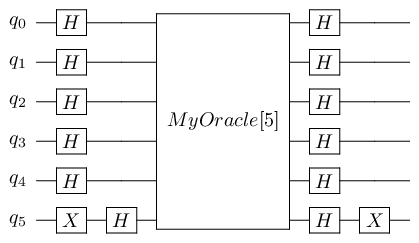

In [25]:
# Notice how the print statement is executed at circuit generation time.
circ = pr.to_circ()
%qatdisplay circ

If we want to display the whole circuit, we can pass the --depth parameter

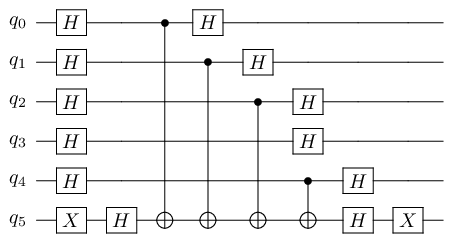

In [26]:
%qatdisplay circ --depth 2

Having already provided the right implementation, we can simulate without the additional linking stage

In [27]:
from qat.qpus import PyLinalg
qpu = PyLinalg()
res = qpu.submit(circ.to_job())
for sample in res:
    print(f"State {sample.state} with amplitude {sample.amplitude}")

State |11101>|0> with amplitude (0.999999999999999+0j)
